# ECE C247 - Neural Networks & Deep Learning
# EEG Dataset

# Group Members
### Anirudh Krishna 
### Swagath Babu
### Jacob Thomas


# Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Define the Parameters

In [ ]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

### We tried different values for the Learning Rate and for the Decay. However, the values defined below are considered the best in order to obtain good performance. 

## Load Data

In [ ]:
data_path = "/content/drive/My Drive/Dataset/C247/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[3], verbose=True)

Training/Valid data shape: (236, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [ ]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [ ]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Comparing different models for Subject 3 and giving a comparative perspective

### The models architecture can be found in the models.py file

## CNN

In [ ]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.49131
	Train loss: 0.04434, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02938, Accuracy: 8/48 (16.67%)
	Test loss: 0.02764, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.31876
	Train loss: 0.04424, Accuracy: 50/188 (26.60%)
	Validation loss: 0.02917, Accuracy: 14/48 (29.17%)
	Test loss: 0.02715, Accuracy: 22/50 (44.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.38041
	Train loss: 0.04353, Accuracy: 58/188 (30.85%)
	Validation loss: 0.02858, Accuracy: 15/48 (31.25%)
	Test loss: 0.02694, Accuracy: 23/50 (46.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.45007
	Train loss: 0.04390, Accuracy: 46/188 (24.47%)
	Validation loss: 0.02815, Accuracy: 15/48 (31.25%)
	Test loss: 0.02651, Accuracy: 23/50 (46.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.35099
	Train loss: 0.04410, Accuracy: 46/188 (24.47%)
	Validation loss: 0.02779, Accuracy: 16/48 (33.33%)
	Test loss: 0.0262

Best validation accuracy:
0.55

Best test accuracy:
0.58

## Plotting Metrics v/s Number of Epochs: 
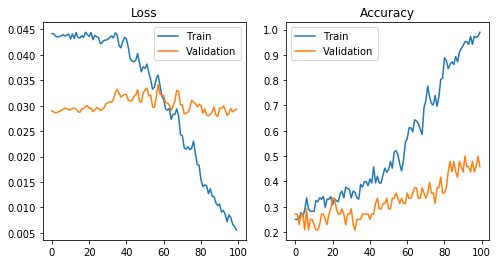

## LSTM

In [ ]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.37124
	Train loss: 0.04439, Accuracy: 46/188 (24.47%)
	Validation loss: 0.02872, Accuracy: 14/48 (29.17%)
	Test loss: 0.02789, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.39063
	Train loss: 0.04443, Accuracy: 46/188 (24.47%)
	Validation loss: 0.02872, Accuracy: 14/48 (29.17%)
	Test loss: 0.02780, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.40019
	Train loss: 0.04427, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02881, Accuracy: 14/48 (29.17%)
	Test loss: 0.02780, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.32091
	Train loss: 0.04406, Accuracy: 50/188 (26.60%)
	Validation loss: 0.02876, Accuracy: 14/48 (29.17%)
	Test loss: 0.02782, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.33112
	Train loss: 0.04354, Accuracy: 55/188 (29.26%)
	Validation loss: 0.02862, Accuracy: 13/48 (27.08%)
	Test loss: 0.027


Best validation accuracy:
0.5

Best test accuracy:
0.36

## Plotting Metrics v/s Number of Epochs: 
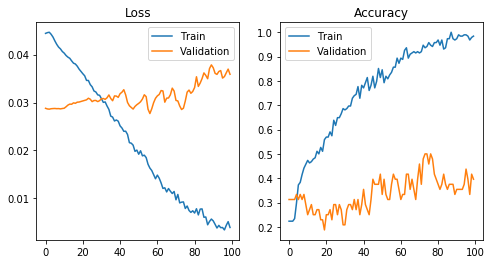

## CNN + LSTM

In [ ]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.37114
	Train loss: 0.04423, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02909, Accuracy: 8/48 (16.67%)
	Test loss: 0.02775, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.36998
	Train loss: 0.04418, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02905, Accuracy: 8/48 (16.67%)
	Test loss: 0.02776, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.37025
	Train loss: 0.04409, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02897, Accuracy: 8/48 (16.67%)
	Test loss: 0.02772, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.37092
	Train loss: 0.04396, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02880, Accuracy: 8/48 (16.67%)
	Test loss: 0.02759, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.36754
	Train loss: 0.04377, Accuracy: 78/188 (41.49%)
	Validation loss: 0.02855, Accuracy: 21/48 (43.75%)
	Test loss: 0.02736, 

Best validation accuracy:
0.8125

Best test accuracy:
0.74

## Plotting Metrics v/s Number of Epochs:
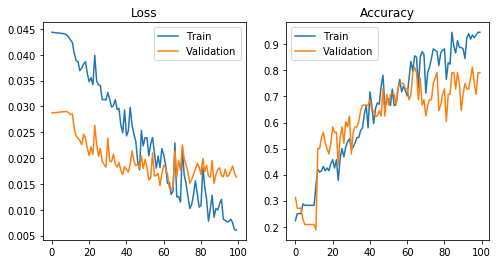

## GRU

In [ ]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.50312
	Train loss: 0.04415, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02906, Accuracy: 13/48 (27.08%)
	Test loss: 0.02808, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.41616
	Train loss: 0.04391, Accuracy: 53/188 (28.19%)
	Validation loss: 0.02926, Accuracy: 12/48 (25.00%)
	Test loss: 0.02810, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.41298
	Train loss: 0.04351, Accuracy: 59/188 (31.38%)
	Validation loss: 0.02944, Accuracy: 12/48 (25.00%)
	Test loss: 0.02818, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.34077
	Train loss: 0.04298, Accuracy: 59/188 (31.38%)
	Validation loss: 0.02967, Accuracy: 13/48 (27.08%)
	Test loss: 0.02829, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.41770
	Train loss: 0.04262, Accuracy: 62/188 (32.98%)
	Validation loss: 0.02986, Accuracy: 12/48 (25.00%)
	Test loss: 0.0283

Best validation accuracy:
0.4791666666666667

Best test accuracy:
0.42

## Plotting Metrics v/s Number of Epochs:
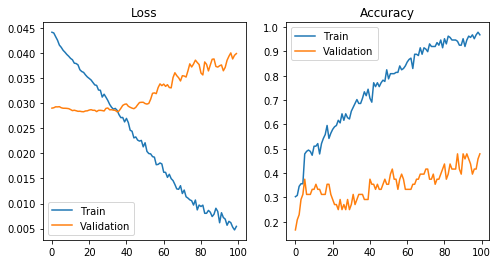

## CNN + GRU

In [ ]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.37801
	Train loss: 0.04424, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02899, Accuracy: 8/48 (16.67%)
	Test loss: 0.02769, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.38499
	Train loss: 0.04416, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02902, Accuracy: 12/48 (25.00%)
	Test loss: 0.02783, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.37835
	Train loss: 0.04403, Accuracy: 51/188 (27.13%)
	Validation loss: 0.02897, Accuracy: 12/48 (25.00%)
	Test loss: 0.02790, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.37854
	Train loss: 0.04373, Accuracy: 54/188 (28.72%)
	Validation loss: 0.02882, Accuracy: 12/48 (25.00%)
	Test loss: 0.02775, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.36511
	Train loss: 0.04310, Accuracy: 64/188 (34.04%)
	Validation loss: 0.02837, Accuracy: 13/48 (27.08%)
	Test loss: 0.02723, 

Best validation accuracy:
0.6875

Best test accuracy:
0.72

## Plotting Metrics v/s Number of Epochs: 

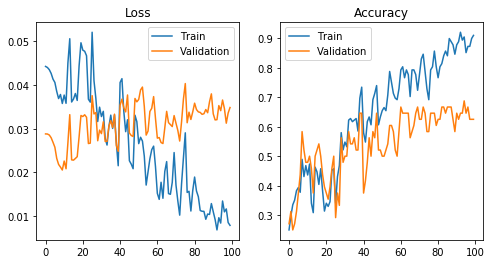